<a href="https://colab.research.google.com/github/JaydaBubel/lab-customer-analysis-round-6/blob/master/Week3_Lab_Round_5_and_6_JaydaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # no more warnings 

from google.colab import drive # if you are using google colab and drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/copy_dapt_rmt_may_23/copy_unit1/Labs/marketing_customer_analysis.csv').drop("Unnamed: 0", axis=1)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [3]:
numerical = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


2. Now we will try to check the normality of the numerical variables visually:
-Use seaborn library to construct distribution plots for the numerical variables
-Use Matplotlib to construct histograms
-Do the distributions for different numerical variables look like a normal distribution

Customer Lifetime Value


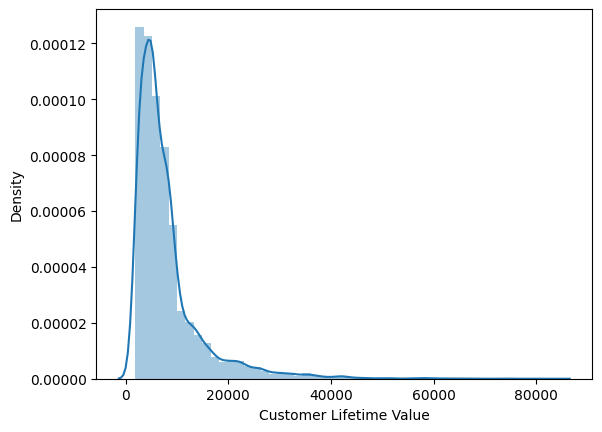

Income


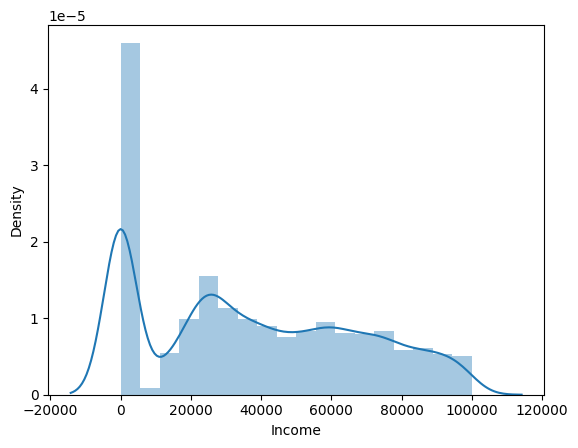

Monthly Premium Auto


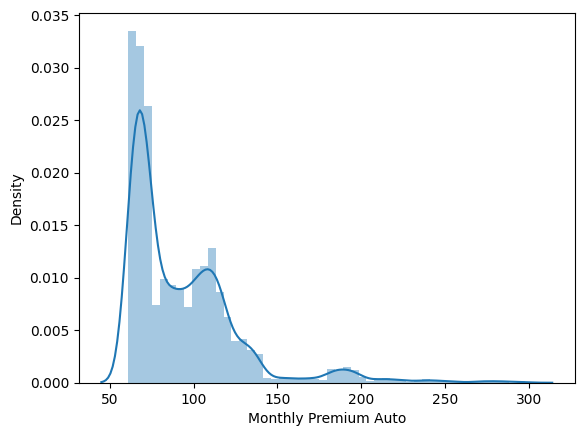

Months Since Last Claim


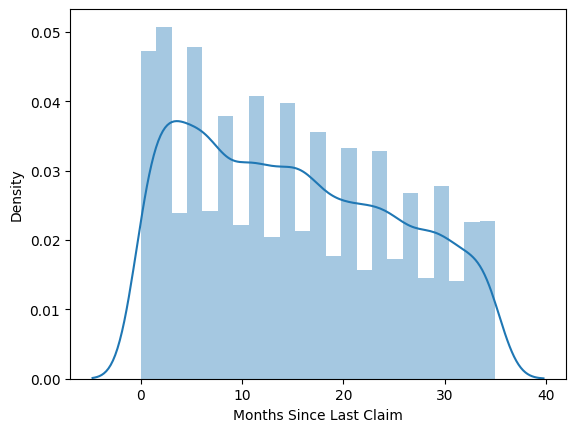

Months Since Policy Inception


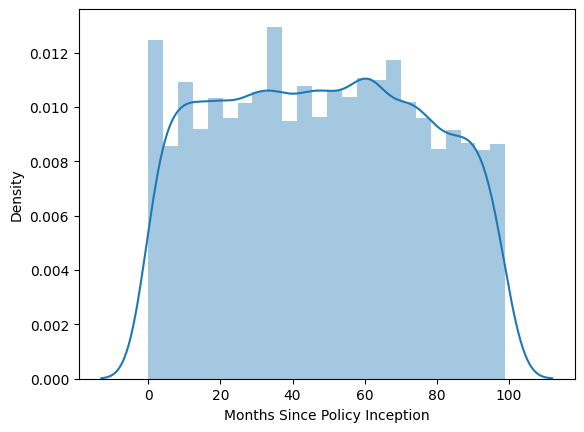

Number of Open Complaints


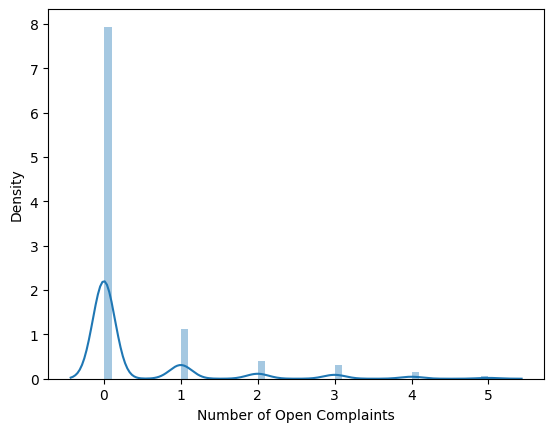

Number of Policies


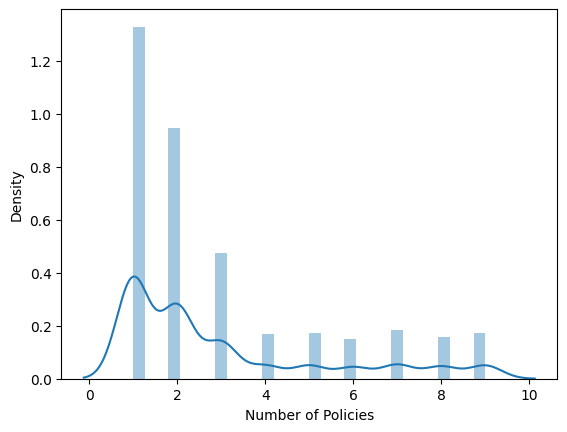

Total Claim Amount


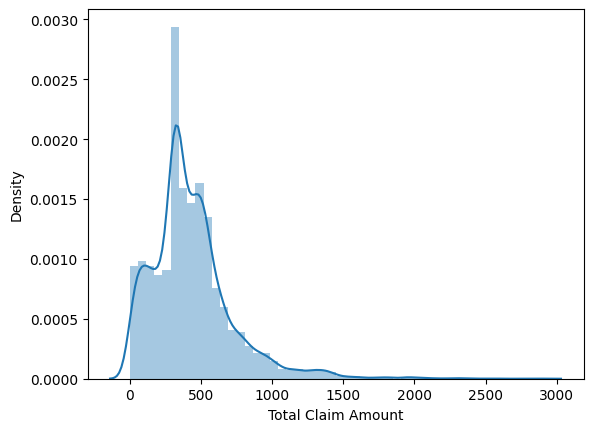

In [4]:
#seaborn, construct dist. plot for numericals
#most are normally distributed; due to no input/0 in series income this appears irregular, and "months since last claim" looks odd
for col in numerical.columns:
  print(col)
  sns.distplot(numerical[col])
  plt.show()

In [ ]:
#Use Matplotlib to construct histograms


Customer Lifetime Value


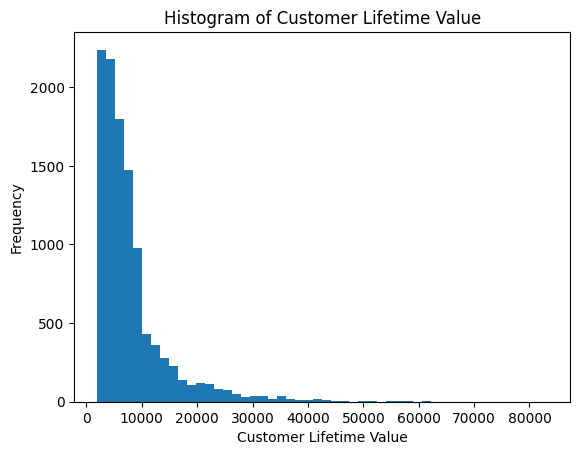

Income


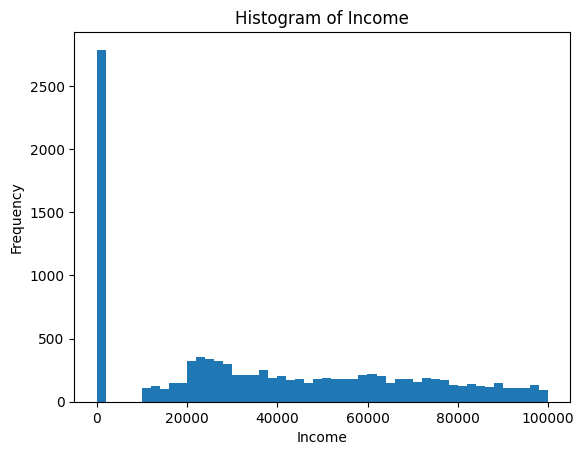

Monthly Premium Auto


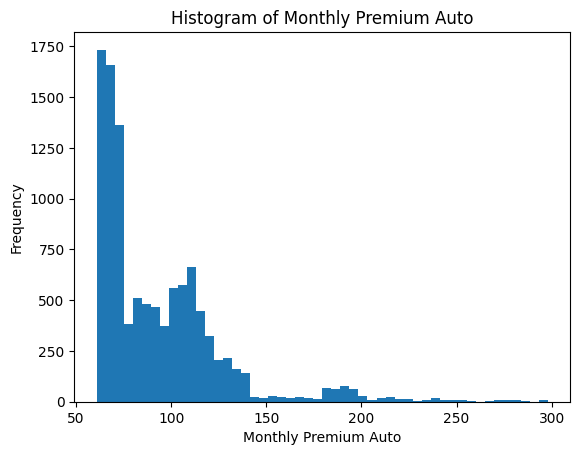

Months Since Last Claim


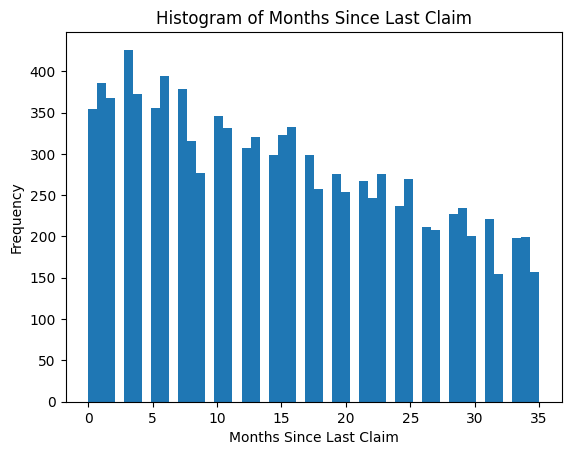

Months Since Policy Inception


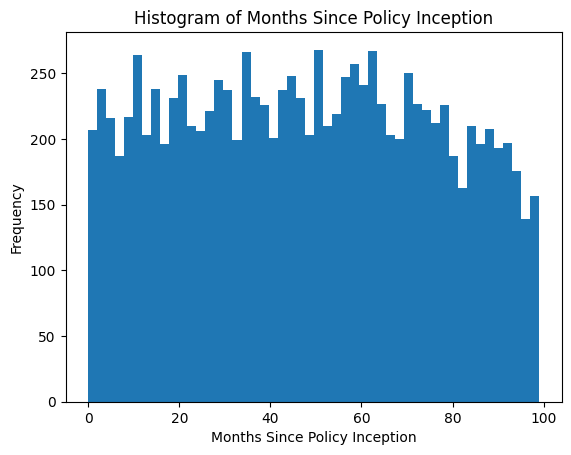

Number of Open Complaints


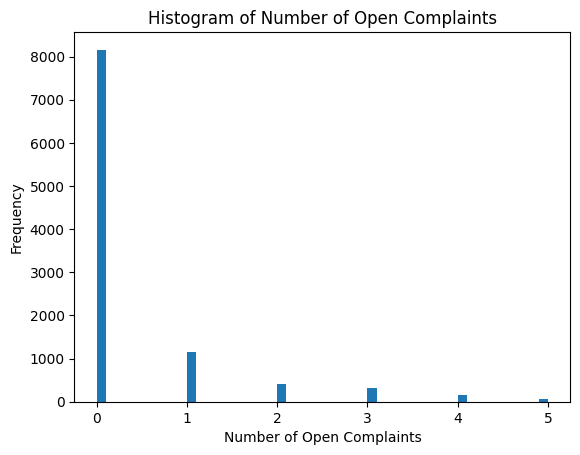

Number of Policies


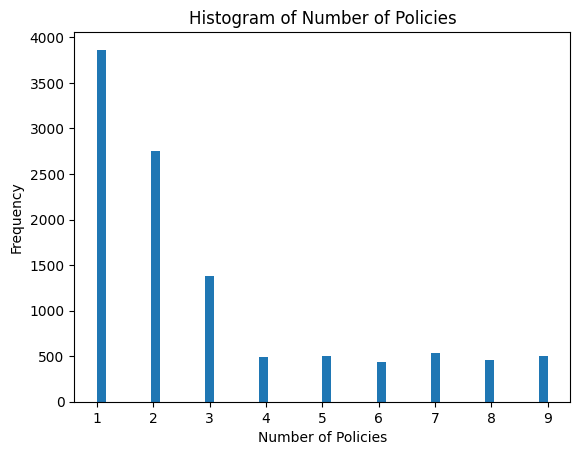

Total Claim Amount


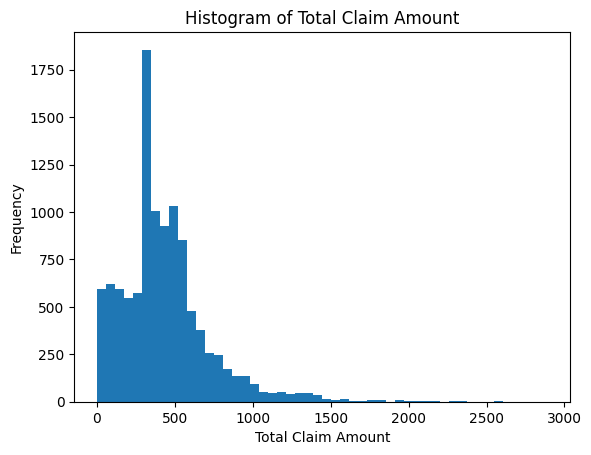

In [5]:
for col in numerical.columns:
    print(col)
    plt.hist(numerical[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [6]:
correlations_matrix = numerical.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


In [7]:
#check features for highest correlation with target

correlations_matrix["Total Claim Amount"].sort_values(ascending=False)

# Monthly Premium Auto is therefore most important feature for predicting toal claim amount

Total Claim Amount               1.000000
Monthly Premium Auto             0.631799
Customer Lifetime Value          0.232626
Months Since Last Claim          0.013137
Months Since Policy Inception    0.003095
Number of Policies              -0.008923
Number of Open Complaints       -0.011379
Income                          -0.354141
Name: Total Claim Amount, dtype: float64

In [8]:
#write filters to help understand these correlations (??)
correlations_matrix[(correlations_matrix['Total Claim Amount'] > .2) | (correlations_matrix['Total Claim Amount'] < -.2)]['Total Claim Amount']

Customer Lifetime Value    0.232626
Income                    -0.354141
Monthly Premium Auto       0.631799
Total Claim Amount         1.000000
Name: Total Claim Amount, dtype: float64

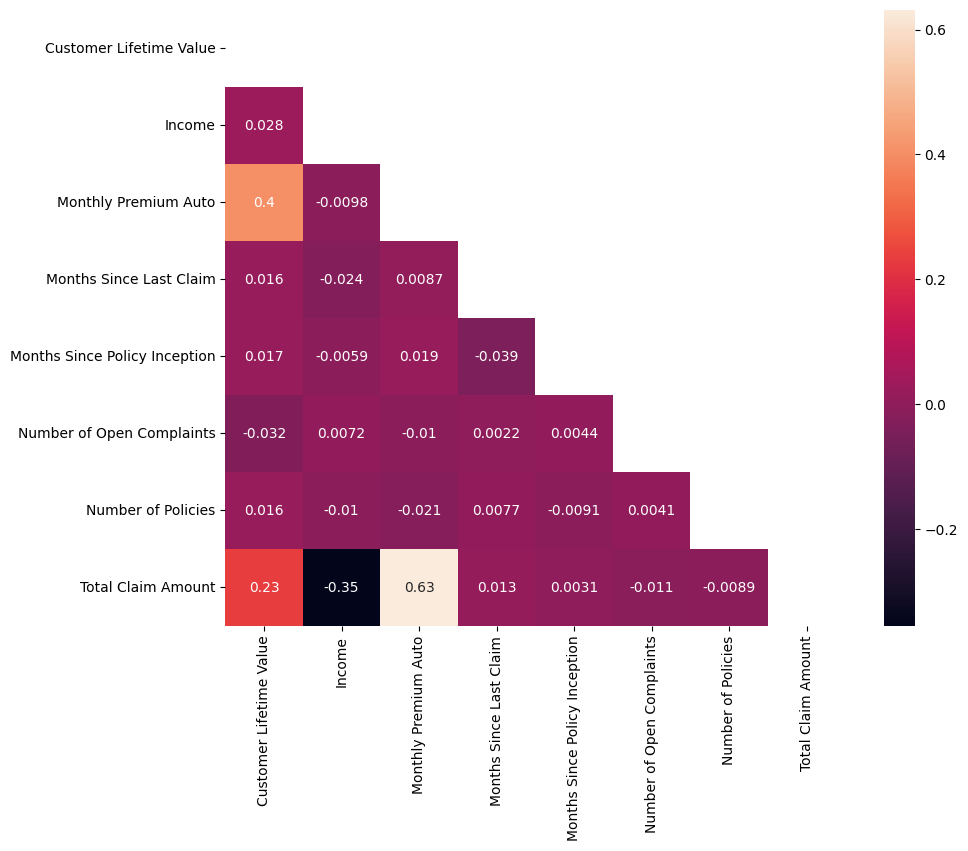

In [9]:
#seabron heatmap
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
# It seems, that there is no high correlation, so no features were dropped.

**Beginning of Lab lab-customer-analysis-round-5**





In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# creating a copy so we don't have to reload the file every mistake
data1 = data.copy()

In [21]:
# X-y split
X = data1.drop(["EmploymentStatus", "Gender"], axis=1)
y = data1["Gender"].copy()
print(y.head())

0    M
1    F
2    M
3    M
4    F
Name: Gender, dtype: object


In [ ]:
# Normalize (numerical)

**Beginning of Lab: lab-customer-analysis-round-6**

In [22]:
# One Hot/Label Encoding
encoder = OneHotEncoder()
encoder.fit(data1[["Gender", "EmploymentStatus"]])

OneHotEncoder()

In [23]:
encoder.transform(data1[["Gender", "EmploymentStatus"]]).todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
encoder.categories_[1]

array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object)

In [25]:
cols = list(encoder.categories_[0]) + list(encoder.categories_[1])
cols

['F', 'M', 'Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed']

In [26]:
data1[cols] = encoder.transform(data1[["Gender", "EmploymentStatus"]]).todense()
data1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Vehicle Class,Vehicle Size,Vehicle Type,F,M,Disabled,Employed,Medical Leave,Retired,Unemployed
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Four-Door Car,Medsize,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Four-Door Car,Medsize,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,SUV,Medsize,A,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Four-Door Car,Medsize,A,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Four-Door Car,Medsize,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,Luxury Car,Medsize,A,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,Four-Door Car,Medsize,A,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,Luxury SUV,Medsize,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,SUV,Medsize,A,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
data1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type', 'F', 'M', 'Disabled', 'Employed', 'Medical Leave',
       'Retired', 'Unemployed'],
      dtype='object')

In [35]:
# Concat DataFrames

In [36]:
# Linear Regression: Train-test split

In [42]:
data1_copy = data1[['F', 'M', 'Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed']].copy()
data1_copy

,F,M,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
10905,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10906,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10907,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10908,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train

,F,M,Disabled,Medical Leave,Retired,Unemployed
10170,1.0,0.0,0.0,0.0,0.0,0.0
2905,0.0,1.0,0.0,0.0,0.0,0.0
10169,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,1.0,0.0,1.0,0.0,0.0
5071,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
5734,0.0,1.0,0.0,0.0,0.0,1.0
5191,0.0,1.0,0.0,0.0,0.0,0.0
5390,1.0,0.0,0.0,0.0,0.0,1.0
860,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
scaler = StandardScaler()

# Fit the scaler object only on the training data:
scaler.fit(X_train)

# Transform training and the testing data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
predictions

array([1.00000000e+00, 1.00000000e+00, 1.11022302e-16, ...,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [ ]:
# Linear Regression: Apply linear regression

In [57]:
X = data1_copy.drop('Employed', axis=1)  # Replace 'Target_Column_Name' with the name of the target column
y = data1_copy['Employed']
lm = LinearRegression()
lm.fit(X, y)
lm

LinearRegression()

In [ ]:
# Model Validation

# Description:
#R2
#MSE
#RMSE
#MAE

In [56]:
rmse = mean_squared_error(y_test, predictions, squared=False) 
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 1.0
RMSE: 3.06120885032045e-16
MAE: 2.6422493890368645e-16


What the metrics reveal:
R2 of 1 is very good, a perfect fit... should be cautious

*   R2 of 1 is very good, a perfect fit... should be cautious
*   MAE of 2.64 is low, but i don't really get it in the context of the values used.


*   RMSE of 3.06 appears low, and suggests errors with low variance...again, i can't exactly understand the application of this, in this context.
